In [1]:
import xarray as xr
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
test_file = '../output/FWsc2000climo_f09_TEM_test05.diag.nc'
ds = xr.open_dataset(test_file)

In [3]:
ds

<xarray.Dataset>
Dimensions:    (time: 60, nbnd: 2, lat: 192, ilev: 71)
Coordinates:
    zlon       float64 ...
  * time       (time) object 0001-01-01 00:00:00 ... 0001-03-01 00:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * ilev       (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 967.5 985.1 1e+03
Dimensions without coordinates: nbnd
Data variables: (12/13)
    date       (time) int32 ...
    datesec    (time) int32 ...
    time_bnds  (time, nbnd) object ...
    uzm        (time, ilev, lat) float32 ...
    vzm        (time, ilev, lat) float32 ...
    epfy       (time, ilev, lat) float64 ...
    ...         ...
    vtem       (time, ilev, lat) float32 ...
    wtem       (time, ilev, lat) float64 ...
    psitem     (time, ilev, lat) float64 ...
    utendepfd  (time, ilev, lat) float64 ...
    utendvtem  (time, ilev, lat) float64 ...
    utendwtem  (time, ilev, lat) float64 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              FWsc2000climo_f09_TEM_test05
    logname:           fvitt
    host:              cheyenne4
    initial_file:      /glade/p/cesmdata/cseg/inputdata/cesm2_init/f.e21.FWsc...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     not_set
    time_period_freq:  day_1
    created:           2022-12-16

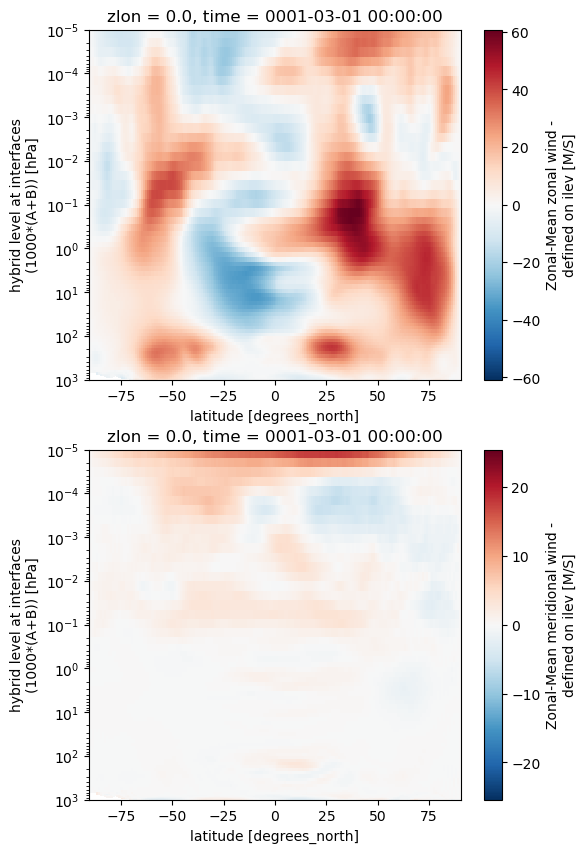

In [4]:
fig, axs = plt.subplots(nrows=2, figsize=(6,10))
ds.uzm.isel(time=-1).plot(ax=axs[0], y='ilev', yscale='log',ylim=[1e3,1e-5])
ds.vzm.isel(time=-1).plot(ax=axs[1], y='ilev', yscale='log',ylim=[1e3,1e-5])
plt.show()

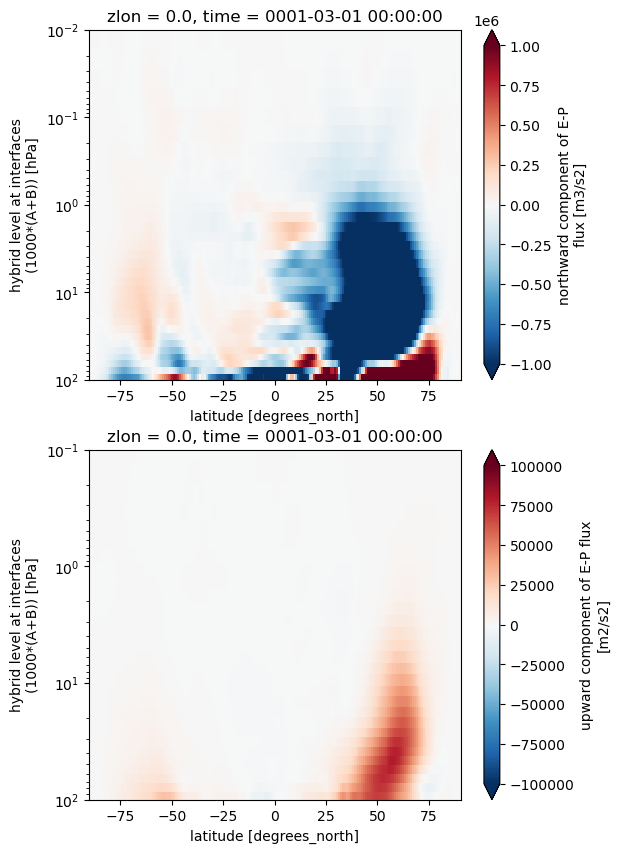

In [13]:
fig, axs = plt.subplots(nrows=2, figsize=(6,10))
ds.epfy.isel(time=-1).plot(ax=axs[0], y='ilev', yscale='log',vmax=1e6,ylim=[1e2,1e-2])
ds.epfz.isel(time=-1).plot(ax=axs[1], y='ilev', yscale='log',vmax=1e5,ylim=[1e2,1e-1])
plt.show()

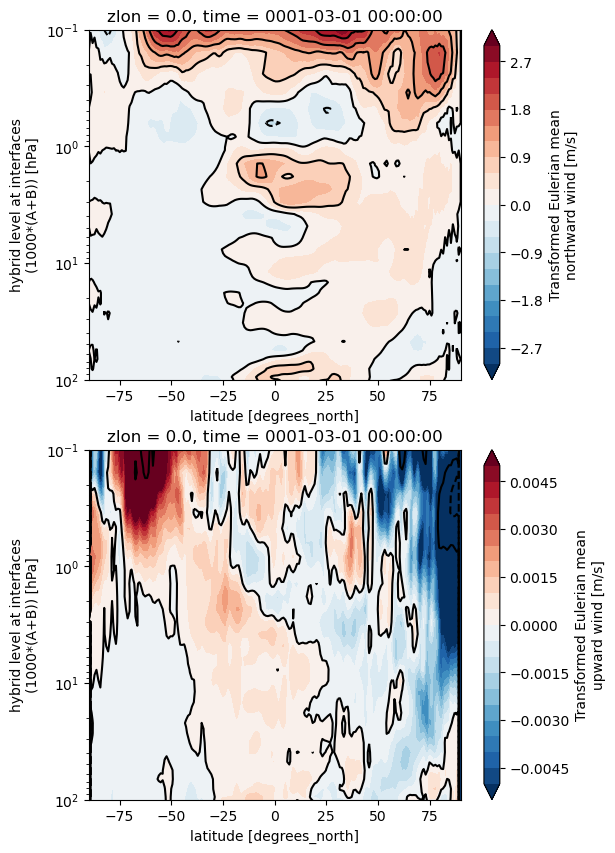

In [6]:
fig, axs = plt.subplots(nrows=2, figsize=(6,10))
ds.vtem.isel(time=-1).plot.contourf(ax=axs[0], levels = 21, y='ilev', yscale='log',vmax=3,vmin=-3,ylim=[1e2,1e-1], cmap = 'RdBu_r')
ds.vtem.isel(time=-1).plot.contour(ax=axs[0], levels = 11, y='ilev', yscale='log',vmax=3,vmin=-3,ylim=[1e2,1e-1],
                                   colors='black', linestyles=None)

ds.wtem.isel(time=-1).plot.contourf(ax=axs[1], levels = 21, y='ilev', yscale='log',vmax=0.005,vmin=-0.005,ylim=[1e2,1e-1], cmap = 'RdBu_r')
ds.wtem.isel(time=-1).plot.contour(ax=axs[1], levels = 7, y='ilev', yscale='log',vmax=0.03,vmin=-0.03,ylim=[1e2,1e-1], 
                                   colors='black', linestyles=None)

plt.show()

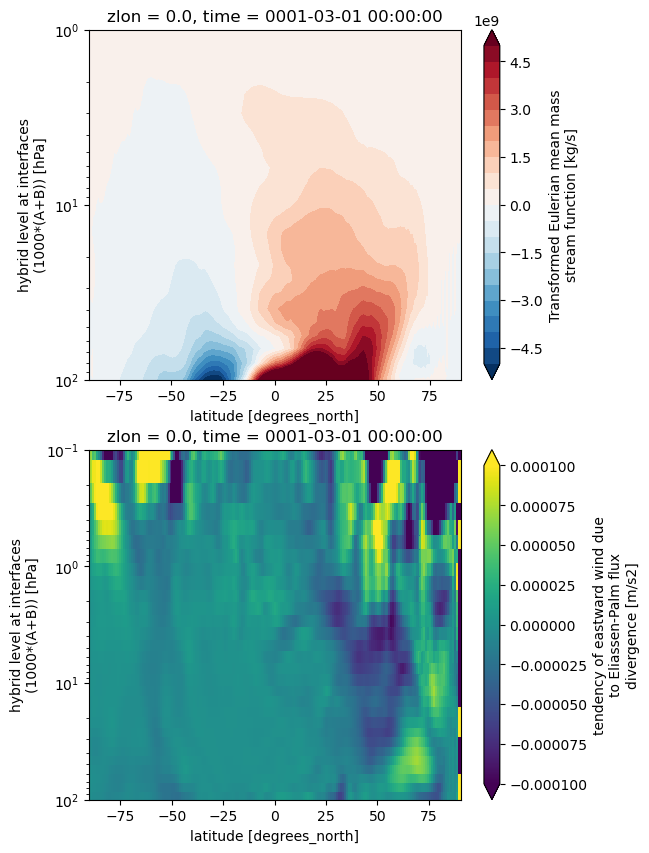

In [16]:
fig, axs = plt.subplots(nrows=2, figsize=(6,10))
psitem1 = ds.psitem.isel(time=-1)
psitem1.plot.contourf(ax=axs[0], levels = 21, y='ilev', yscale='log',vmax=5e9,ylim=[1e2,1])
#ds.psitem.isel(time=-1).plot.contourf(ax=axs[1], levels = 21, y='ilev', yscale='log',vmax=5e9,ylim=[1e2,1])

ds.utendepfd.isel(time=-1).plot(ax=axs[1], y='ilev', yscale='log',vmax=0.0001,vmin=-0.0001,ylim=[1e2,1e-1])
plt.show()

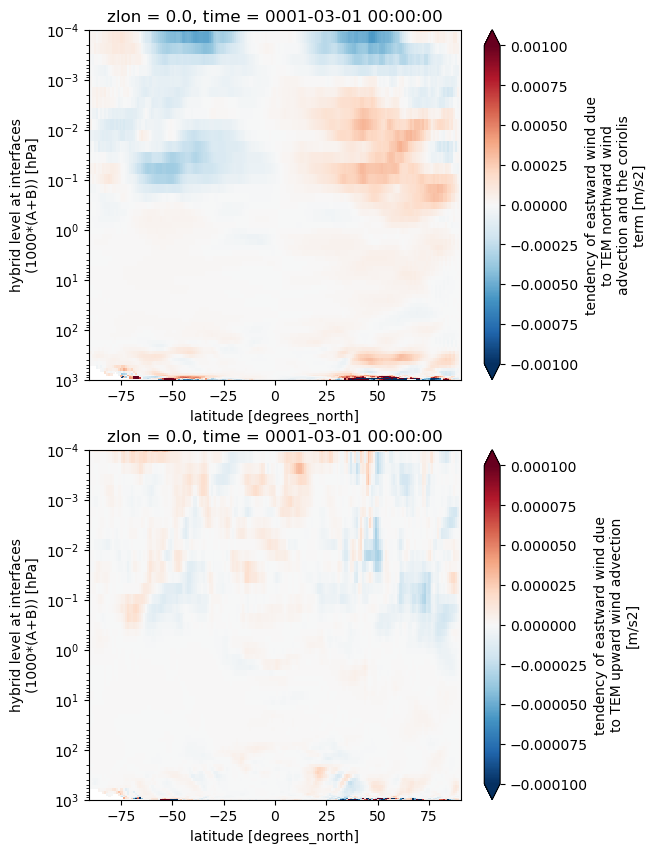

In [8]:
fig, axs = plt.subplots(nrows=2, figsize=(6,10))
ds.utendvtem.isel(time=-1).plot(ax=axs[0], y='ilev', yscale='log',vmax=0.001, ylim=[1e3,1e-4])
ds.utendwtem.isel(time=-1).plot(ax=axs[1], y='ilev', yscale='log',vmax=0.0001, ylim=[1e3,1e-4])
plt.show()